In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/twitter.csv')
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-twitter.csv', index=False)
test.to_csv('test-twitter.csv', index=False)

In [5]:
train_df = pd.read_csv("train-twitter.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,1,"@enfox No, it means I tried a different kebab ..."
1,1,@misshannahshae Hey what's good? U seemed like...
2,1,everyone should take a chill pill and let the ...
3,1,Shopping was exhausting.. what a busy weekend ...
4,0,@hellobebe Ditto. I wish it were Friday already.
...,...,...
18423,1,"@crustydolphin Woah, I get 27 COMMENTS a week!"
18424,1,"TG ticketing office, Few cutie ground ofiicers"
18425,0,boreddd and stuck at home
18426,0,I have a headache the hotel party wasnt even ...


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_26680\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


"@enfox No, it means I tried a different kebab shop this time. But you're right, a beer or two would have made it even better. "

In [8]:
test_df = pd.read_csv("test-twitter.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(2047, 2)

In [10]:
test_df.head()

,sentiment,review
0,1,"@Mayra326 aww, have fun! I just had my 3D las..."
1,1,@meghanelaine - I knew that. I was so agreein...
2,1,@rahulrakesh hahah... treated by my Ex boss
3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,0,@Faith03 I've been getting responses about the...


In [11]:
train_df['sentiment'] = (train_df['sentiment']==1).astype(int)
test_df['sentiment'] = (test_df['sentiment']==1).astype(int)

train_df.head(30)

,sentiment,review
0,1,"@enfox No, it means I tried a different kebab ..."
1,1,@misshannahshae Hey what's good? U seemed like...
2,1,everyone should take a chill pill and let the ...
3,1,Shopping was exhausting.. what a busy weekend ...
4,0,@hellobebe Ditto. I wish it were Friday already.
5,1,@johimself Everyone on here is saying The Hang...
6,0,@SummerTheKid I just wrote a massive reply on ...
7,1,Had a lot of fun last night
8,1,@JulieCorrigan http://bit.ly/MWrMg part of t...
9,1,Enjoying the weather over here! So beautiful!


In [12]:
test_df.head()

,sentiment,review
0,1,"@Mayra326 aww, have fun! I just had my 3D las..."
1,1,@meghanelaine - I knew that. I was so agreein...
2,1,@rahulrakesh hahah... treated by my Ex boss
3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,0,@Faith03 I've been getting responses about the...


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,"@enfox No, it means I tried a different kebab ..."
1,1,1,@misshannahshae Hey what's good? U seemed like...
2,2,1,everyone should take a chill pill and let the ...
3,3,1,Shopping was exhausting.. what a busy weekend ...
4,4,0,@hellobebe Ditto. I wish it were Friday already.


In [14]:
train_df_bert

,id,label,sentence
0,0,1,"@enfox No, it means I tried a different kebab ..."
1,1,1,@misshannahshae Hey what's good? U seemed like...
2,2,1,everyone should take a chill pill and let the ...
3,3,1,Shopping was exhausting.. what a busy weekend ...
4,4,0,@hellobebe Ditto. I wish it were Friday already.
...,...,...,...
18423,18423,1,"@crustydolphin Woah, I get 27 COMMENTS a week!"
18424,18424,1,"TG ticketing office, Few cutie ground ofiicers"
18425,18425,0,boreddd and stuck at home
18426,18426,0,I have a headache the hotel party wasnt even ...


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,1,"@enfox No, it means I tried a different kebab ..."
1,1,1,@misshannahshae Hey what's good? U seemed like...
2,2,1,everyone should take a chill pill and let the ...
3,3,1,Shopping was exhausting.. what a busy weekend ...
4,4,0,@hellobebe Ditto. I wish it were Friday already.
...,...,...,...
9995,9995,0,@LeBronJames2010 where was the mojo?! I cheere...
9996,9996,0,All the reviews I have read of Transformers 2 ...
9997,9997,0,My sunburns hurt to much to even sleep on my s...
9998,9998,0,no one knows how much i love pork roll egg and...


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,"@Mayra326 aww, have fun! I just had my 3D las..."
1,1,1,@meghanelaine - I knew that. I was so agreein...
2,2,1,@rahulrakesh hahah... treated by my Ex boss
3,3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,4,0,@Faith03 I've been getting responses about the...


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,1,"@Mayra326 aww, have fun! I just had my 3D las..."
1,1,1,@meghanelaine - I knew that. I was so agreein...
2,2,1,@rahulrakesh hahah... treated by my Ex boss
3,3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,4,0,@Faith03 I've been getting responses about the...
...,...,...,...
2042,2042,1,@verbaltactician great Now make a video!!! :p
2043,2043,0,@EmVee1 is this for me??
2044,2044,1,Can't read my genie face just left phoenix st...
2045,2045,1,"Just watched The House Bunny, I agree.. with t..."


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  @misshannahshae Hey what's good? U seemed like cool peoples soooo I followed ya. follow me in return... 
Tokenized:  ['@', 'miss', '##han', '##nah', '##sha', '##e', 'hey', 'what', "'", 's', 'good', '?', 'u', 'seemed', 'like', 'cool', 'peoples', 'soo', '##oo', 'i', 'followed', 'ya', '.', 'follow', 'me', 'in', 'return', '.', '.', '.']
Token IDs:  [1030, 3335, 4819, 15272, 7377, 2063, 4931, 2054, 1005, 1055, 2204, 1029, 1057, 2790, 2066, 4658, 7243, 17111, 9541, 1045, 2628, 8038, 1012, 3582, 2033, 1999, 2709, 1012, 1012, 1012]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  84


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  72


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  @enfox No, it means I tried a different kebab shop this time. But you're right, a beer or two would have made it even better. 
Token IDs: tensor([  101,  1030,  4372, 14876,  2595,  2053,  1010,  2009,  2965,  1045,
         2699,  1037,  2367, 17710,  3676,  2497,  4497,  2023,  2051,  1012,
         2021,  2017,  1005,  2128,  2157,  1010,  1037,  5404,  2030,  2048,
         2052,  2031,  2081,  2009,  2130,  2488,  1012,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [27]:

train_df_bert.head()

,id,label,sentence
0,0,1,"@enfox No, it means I tried a different kebab ..."
1,1,1,@misshannahshae Hey what's good? U seemed like...
2,2,1,everyone should take a chill pill and let the ...
3,3,1,Shopping was exhausting.. what a busy weekend ...
4,4,0,@hellobebe Ditto. I wish it were Friday already.


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (2047, 60)


In [31]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))

model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            5152      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 3

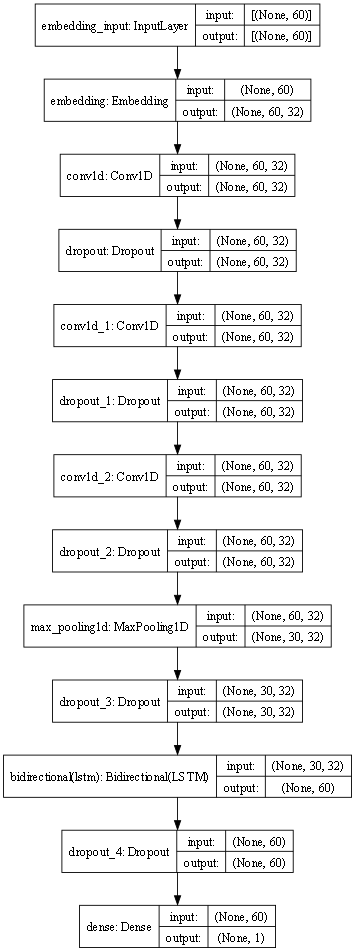

In [32]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [33]:
import keras
import numpy as np
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 18s 12ms/step - loss: 0.5811 - accuracy: 0.6831 - val_loss: 0.5437 - val_accuracy: 0.7240
Epoch 2/20
900/900 [==============================] - 10s 12ms/step - loss: 0.4554 - accuracy: 0.7943 - val_loss: 0.5649 - val_accuracy: 0.7210
Epoch 3/20
900/900 [==============================] - 10s 12ms/step - loss: 0.3922 - accuracy: 0.8327 - val_loss: 0.5556 - val_accuracy: 0.7300
Epoch 4/20
313/313 [==============================] - 3s 5ms/step - loss: 0.3019 - accuracy: 0.8820
Training Accuracy: 0.882000
Training Loss: 0.301868
64/64 [==============================] - 0s 6ms/step - loss: 0.6323 - accuracy: 0.7118
Testing Accuracy:  0.711773
Testing Loss:  0.632282


In [65]:
import numpy as np
y_pred = model.predict(x_test)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)

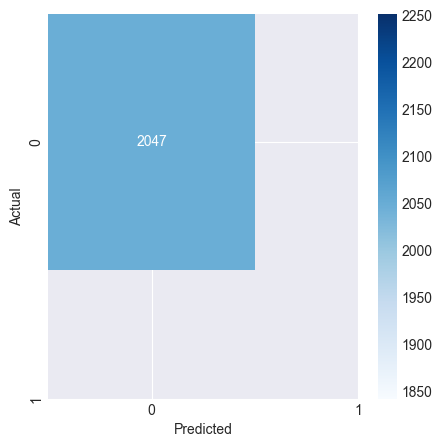

In [67]:
import seaborn as sn
labels=['0', '1']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

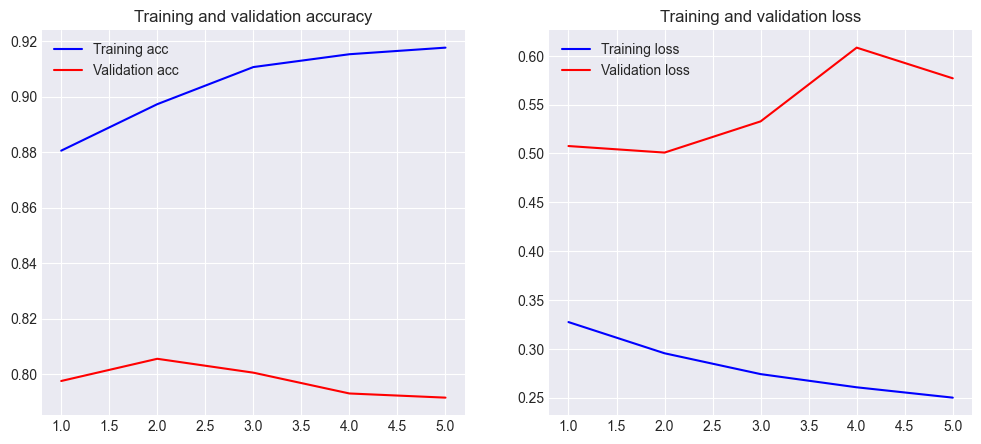

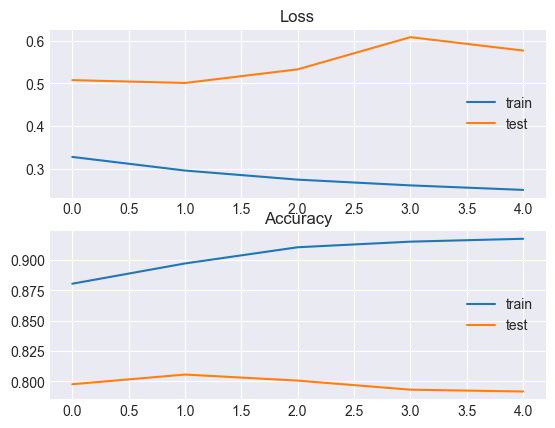

In [68]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()